<center><img src="https://semcomp-epcc-unsa.github.io/assets/images/cslogos/logo-only.png" width="120">


$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Escuela \ Profesional \ de \ Ciencia \ de \ la \ Computación  }$

---


#<center>$Laboratorio \ 03$

**Curso:** *Computacón Gráfica*

**Tema:** *Erosión - Dilatación*

**Profesora:** *Paccotacya Yanque, Rosa Yuliana Gabriela*

**Alumno:** *Nifla Llallacachi, Manuel Angel* \\



---



In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline



---
#*A. FUNCIONES DE EROSION Y DILATACION*


In [ ]:
import numpy as np

def erosion(imagen, kernel):
    filas, columnas = imagen.shape
    k_filas, k_columnas = kernel.shape
    resultado = np.zeros_like(imagen)
    for i in range(filas):
        for j in range(columnas):
            minimo = 255
            for m in range(k_filas):
                for n in range(k_columnas):
                    if kernel[m, n] == 1:
                        if (i - m >= 0 and i - m < filas and
                            j - n >= 0 and j - n < columnas):
                            minimo = min(minimo, imagen[i - m, j - n])
            resultado[i, j] = minimo
    return resultado

def dilatacion(imagen, kernel):
    filas, columnas = imagen.shape
    k_filas, k_columnas = kernel.shape
    resultado = np.zeros_like(imagen)
    for i in range(filas):
        for j in range(columnas):
            maximo = 0
            for m in range(k_filas):
                for n in range(k_columnas):
                    if kernel[m, n] == 1:
                        if (i - m >= 0 and i - m < filas and
                            j - n >= 0 and j - n < columnas):
                            maximo = max(maximo, imagen[i - m, j - n])
            resultado[i, j] = maximo
    return resultado




---
##*A.A. PRUEBAS DE LAS FUNCIONES*


In [ ]:
# Ejemplo de uso:
imagen = np.array([[0, 0, 0, 0, 0],
                   [0, 255, 255, 0, 0],
                   [0, 255, 255, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]], dtype=np.uint8)

kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

resultado_erosion = erosion(imagen, kernel)
resultado_dilatacion = dilatacion(imagen, kernel)

print("Imagen original:")
print(imagen)
print("\nResultado de la erosión:")
print(resultado_erosion)
print("\nResultado de la dilatación:")
print(resultado_dilatacion)


Imagen original:
[[  0   0   0   0   0]
 [  0 255 255   0   0]
 [  0 255 255   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]

Resultado de la erosión:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Resultado de la dilatación:
[[  0   0   0   0   0]
 [  0 255 255 255 255]
 [  0 255 255 255 255]
 [  0 255 255 255 255]
 [  0 255 255 255 255]]


##*Slides 16*

In [ ]:
Imagen16 = np.array([[0, 0, 0, 0, 0, 0],
                  [0, 255, 0, 0, 0, 0],
                  [0, 255, 0, 0, 0, 0],
                  [0, 255, 255, 0, 0, 0],
                  [0, 0, 255, 255, 0, 0],
                  [0, 0, 0, 0, 0, 0]], dtype=np.uint8)

kernel16 = np.array([[1, 1]])

erosion_result = erosion(Imagen16, kernel16)
dilation_result = dilatacion(Imagen16, kernel16)

print("Imagen original:")
print(Imagen16)
'''
print("\nResultado de la erosión:")
print(erosion_result)
'''
print("\nResultado de la dilatación:")
print(dilation_result)

Imagen original:
[[  0   0   0   0   0   0]
 [  0 255   0   0   0   0]
 [  0 255   0   0   0   0]
 [  0 255 255   0   0   0]
 [  0   0 255 255   0   0]
 [  0   0   0   0   0   0]]

Resultado de la dilatación:
[[  0   0   0   0   0   0]
 [  0 255 255   0   0   0]
 [  0 255 255   0   0   0]
 [  0 255 255 255   0   0]
 [  0   0 255 255 255   0]
 [  0   0   0   0   0   0]]


##*Slides 19*

In [ ]:
Imagen19 = np.array([[0, 0, 0, 0, 0],
                  [0, 0, 255, 0, 0],
                  [0, 0, 255, 255, 0],
                  [0, 0, 255, 0, 0],
                  [0, 255, 255, 255, 0],
                  [0, 0, 0, 0, 0]], dtype=np.uint8)

kernel19 = np.array([[1, 1]])

erosion_result = erosion(Imagen19, kernel19)

#erosion_result = np.delete(erosion_result,1,axis=1)
dilation_result = dilatacion(Imagen19, kernel19)

print("Imagen original:")
print(Imagen19)
print("\nResultado de la erosión:")
print(erosion_result)
#print("\nResultado de la dilatación:")
#print(dilation_result)

#fig.show()


Imagen original:
[[  0   0   0   0   0]
 [  0   0 255   0   0]
 [  0   0 255 255   0]
 [  0   0 255   0   0]
 [  0 255 255 255   0]
 [  0   0   0   0   0]]

Resultado de la erosión:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0 255   0]
 [  0   0   0   0   0]
 [  0   0 255 255   0]
 [  0   0   0   0   0]]




---


#*B. CARGANDO IMAGENES*

##*B.A. Imagen 01*

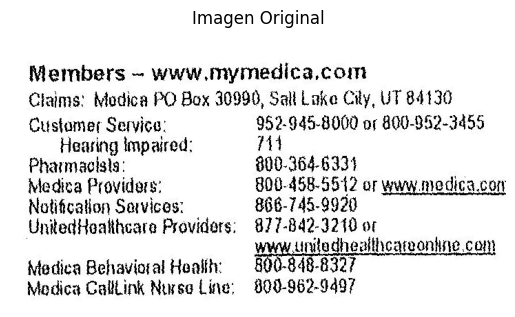

In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image


Imagen = Image.open( "text.png" )
Imagen_array = np.array(Imagen)
Imagen_G = cv2.imread('text.png', cv2.IMREAD_GRAYSCALE)
Imagen_G2 = cv2.cvtColor(Imagen_G, cv2.COLOR_BGR2RGB)

plt.imshow(Imagen_array)
plt.title('Imagen Original')
plt.axis('off')

plt.show()

###*B.A.A. APLICANDO EROSION*

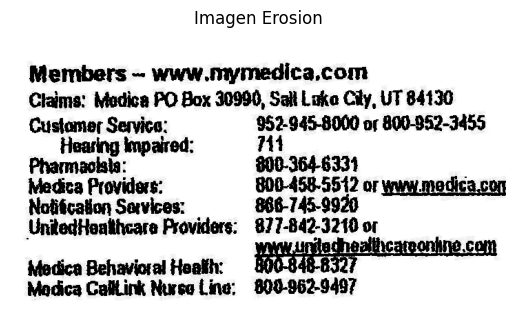

In [ ]:
kernelI1 = np.array([[1, 1, 1],
                     [1, 1, 1]])

#erosion_result = np.delete(erosion_result,1,axis=1)
erosion_result = erosion(Imagen_G, kernelI1)
erosion_G = cv2.cvtColor(erosion_result, cv2.COLOR_BGR2RGB)

#print("Imagen original:")
#print(Imagen19)
#print("\nResultado de la erosión:")
#print(erosion_result)

plt.imshow(erosion_G)
plt.title('Imagen Erosion')
plt.axis('off')

plt.show()



---

##*B.B. IMAGEN 02*

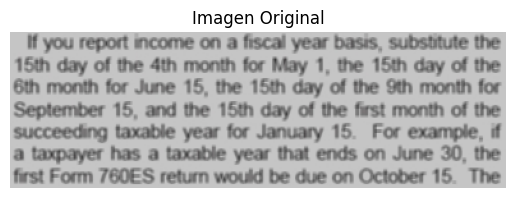

In [ ]:
Imagen2 = Image.open( "text2.jpg" )
Imagen2_array = np.array(Imagen2)
Imagen2_G = cv2.imread('text2.jpg', cv2.IMREAD_GRAYSCALE)
Imagen2_G2 = cv2.cvtColor(Imagen2_G, cv2.COLOR_BGR2RGB)


#fig = px.imshow(Imagen)
#fig.show()
plt.imshow(Imagen2_array)
plt.title('Imagen Original')
plt.axis('off')

#plt.show()
#plt.imshow(Imagen2_G2)
#plt.title('Imagen Escala a Grises')
#plt.axis('off')

plt.show()
#print(Imagen_array)

###*B.B.A. APLICANDO DILATACION*

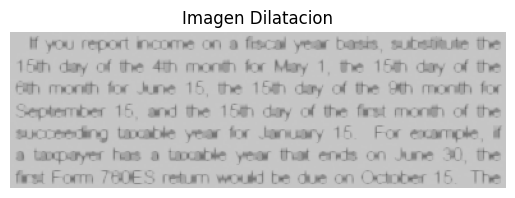

In [ ]:
kernelI1 = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

#erosion_result = np.delete(erosion_result,1,axis=1)
dilation2_result = dilatacion(Imagen2_G, kernelI1)
dilation2_G = cv2.cvtColor(dilation2_result, cv2.COLOR_BGR2RGB)

#print("Imagen original:")
#print(Imagen19)
#print("\nResultado de la erosión:")
#print(erosion_result)

plt.imshow(dilation2_G)
plt.title('Imagen Dilatacion')
plt.axis('off')

plt.show()



---

##*B.C. IMAGEN 03*

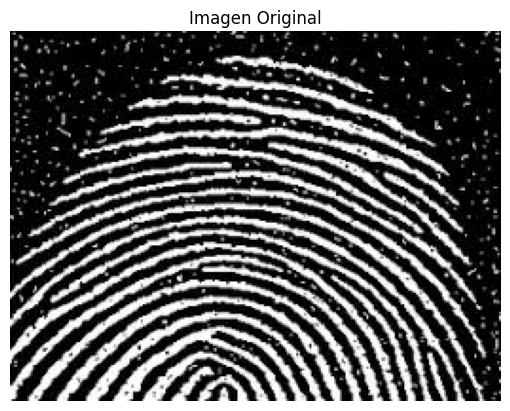

In [ ]:
Imagen3 = Image.open( "fingerprint.jpeg" )
Imagen3_array = np.array(Imagen3)
Imagen3_G = cv2.imread('fingerprint.jpeg', cv2.IMREAD_GRAYSCALE)
Imagen3_G2 = cv2.cvtColor(Imagen3_G, cv2.COLOR_BGR2RGB)


#fig = px.imshow(Imagen)
#fig.show()
plt.imshow(Imagen3_array)
plt.title('Imagen Original')
plt.axis('off')

#plt.show()
#plt.imshow(Imagen2_G2)
#plt.title('Imagen Escala a Grises')
#plt.axis('off')

plt.show()
#print(Imagen_array)

###*B.C.A APLICANDO EROSION*

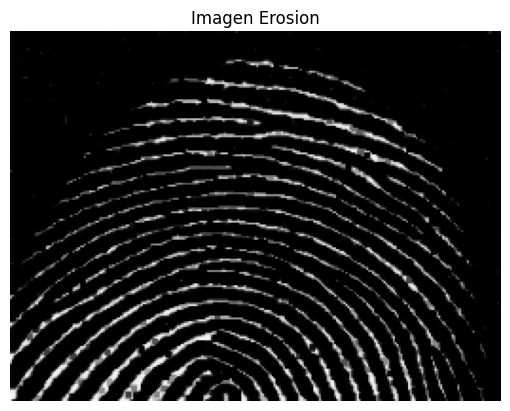

In [ ]:
kernelI3 = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

#erosion_result = np.delete(erosion_result,1,axis=1)
erosion3_result = erosion(Imagen3_G, kernelI3)
erosion3_G = cv2.cvtColor(erosion3_result, cv2.COLOR_BGR2RGB)

#print("Imagen original:")
#print(Imagen19)
#print("\nResultado de la erosión:")
#print(erosion_result)

plt.imshow(erosion3_G)
plt.title('Imagen Erosion')
plt.axis('off')

plt.show()

###*B.C.B. APLICANDO EROSION*

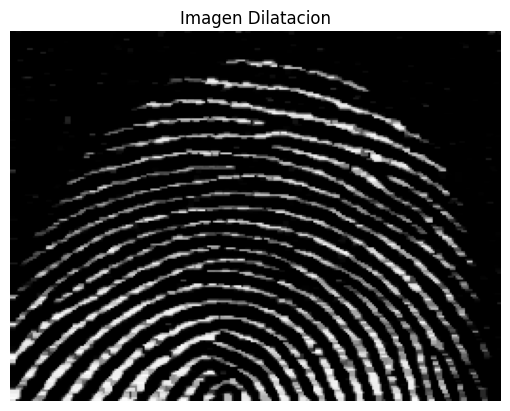

In [ ]:
kernelI31 = np.array([[1, 1, 1]])

dilatacion3_result = dilatacion(erosion3_result, kernelI31)
dilation3_G = cv2.cvtColor(dilatacion3_result, cv2.COLOR_BGR2RGB)

plt.imshow(dilation3_G)
plt.title('Imagen Dilatacion')
plt.axis('off')

plt.show()